In [1]:
import logging
import os
import pandas as pd

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

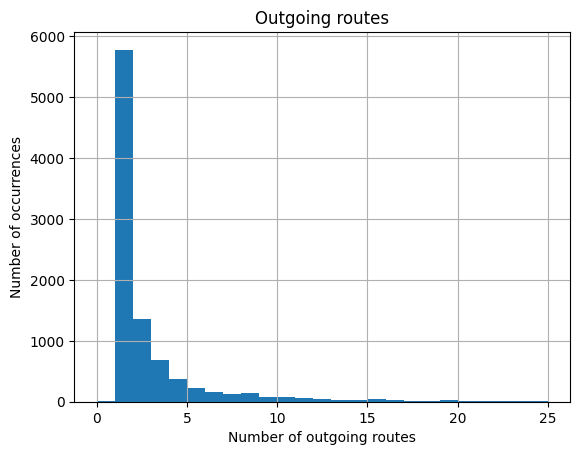

In [3]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

## Scenario

In [4]:
scenario_file = "../data/prorail/scenarios/SHL-2025-06-26.json"
# Replan these agents, -1 is planning in a new agent
agent_id = 1
scenario = Scenario(layout, scenario_file)

## Experiment
Define three experiments:
1. Classical @SIPP, no extra flexibility
2. FlexSIPP but not including the recovery time
3. FlexSIPP

In [5]:
# Setup experiment
experiment_settings = [
    {
        "start_time": 1080,
        "origin": "SHL|5",
        "destination": "RTD|2",
        "filter_agents": agent_id,
        "metadata": {
            "offset": 2,
        }
    },
    {
        "start_time": 1080,
        "max_buffer_time": 500,
        "origin": "SHL|5",
        "destination": "RTD|2",
        "filter_agents": agent_id,
        "metadata": {
            "color": "Green",
            "label": "Buffer time",
            "offset": 1,
        }
    },{
        "start_time": 1080,
        "origin": "SHL|5",
        "destination": "RTD|2",
        "max_buffer_time": 500,
        "use_recovery_time": True,
        "filter_agents": agent_id,
        "metadata": {
            "color": "Blue",
            "label": "Recovery time",
        }
    }
]

experiments = setup_experiment(scenario, experiment_settings)

INFO:pybook.setup:Setting up experiment {'start_time': 1080, 'origin': 'SHL|5', 'destination': 'RTD|2', 'filter_agents': 1, 'metadata': {'offset': 2, 'color': 'Red', 'label': 'No flexibility'}, 'velocity': 38.888888888888886, 'max_buffer_time': 0, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': 1080, 'max_buffer_time': 500, 'origin': 'SHL|5', 'destination': 'RTD|2', 'filter_agents': 1, 'metadata': {'color': 'Green', 'label': 'Buffer time', 'offset': 1}, 'velocity': 38.888888888888886, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': 1080, 'origin': 'SHL|5', 'destination': 'RTD|2', 'max_buffer_time': 500, 'use_recovery_time': True, 'filter_agents': 1, 'metadata': {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}, 'velocity': 38.888888888888886}


### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


C:\Users\erick\Documents\uni\Thesis\delay-replannning\generation\safe_interval_graph.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


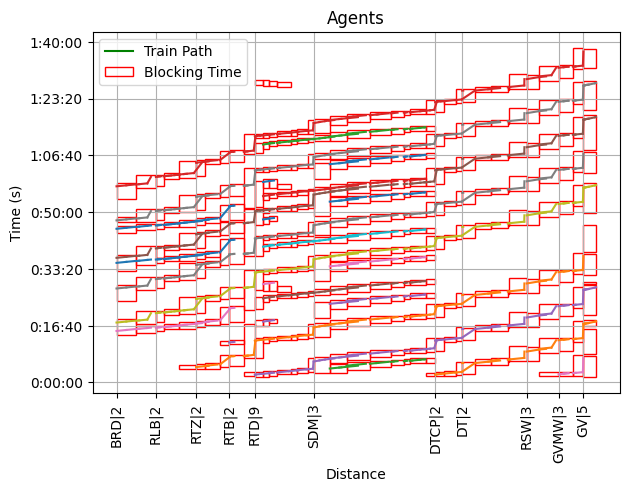

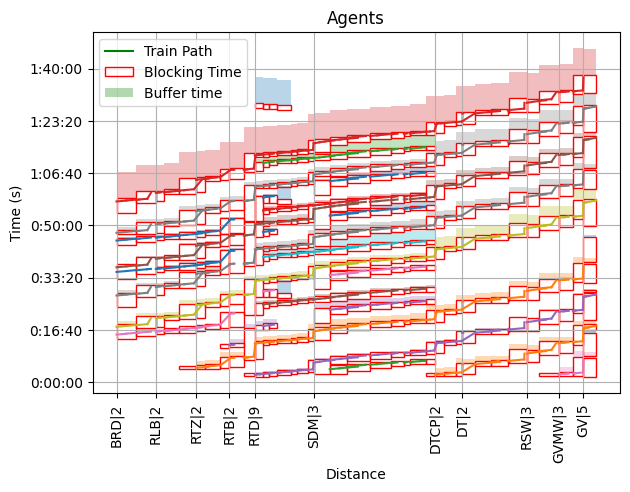

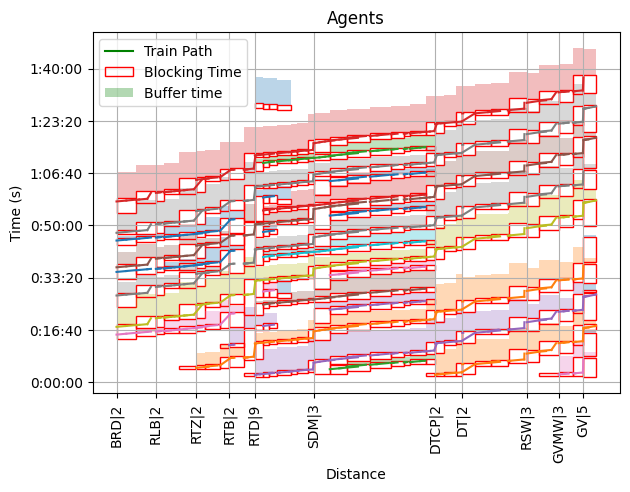

In [6]:
for exp in experiments:
    exp.s.plot(agent_id, exp.block_intervals, exp.buffer_times, exp.recovery_times, False)

In [7]:
for exp in experiments:
    exp.agent.start_time = 1503

In [11]:
timeout = 600
run_experiments([experiments[1]], timeout)

DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Shl|1078 --goal r-Rtd|344 --edgegraph output --search repeat --startTime 1503
DEBUG:pybook.setup:repeat output: ['<0,inf,inf,inf> <-inf,1600.72,4058.34,4058.34>', '<1600.72,inf,inf,inf> <1600.72,1648.4,4058.34,4106.02>', '<1648.4,inf,inf,inf> <-inf,1648.4,4106.02,4106.02>', '<1600.72,1648.4,4058.34,4106.02> <-inf,1648.4,4106.02,4106.02>', '<1648.4,inf,inf,inf> <1648.4,1693.5,4106.02,4151.12>', '<1648.4,1648.4,4106.02,4106.02> <1648.4,1693.5,4106.02,4151.12>', '<1600.72,1648.4,4058.34,4106.02> <1648.4,1648.4,4106.02,4106.02>', '<1693.5,inf,inf,inf> <-inf,1693.5,4151.15,4151.15>', '<1648.4,1693.5,4106.02,4151.12> <-inf,1693.5,4151.15,4151.15>', '<1648.4,1648.4,4106.02,4106.02> <-inf,1648.4,4151.15,4151.15>', '<1600.72,1648.4,4058.34,4106.02> <-inf,1648.4,4151.15,4151.15>', '<1693.5,inf,inf,inf> <1693.5,1702.24,4151.15,4159.88>', '<1693.5,1693.5,4151.15,4151.15> <1693.5,1702.24,4151.15,4159.88>', '<1648.4,1693.5,4106.02,4

## Results

### ATF Plot

C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\setup.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[0].get_xticks()])
C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\setup.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([str(timedelta(seconds=ytick)) for ytick in axs[0].get_yticks()])
C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\setup.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([str(timedelta(seconds=xtick)) for xtick in axs[1].get_xticks()])
INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251163692B0>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025124A2D760>
INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025116670580>


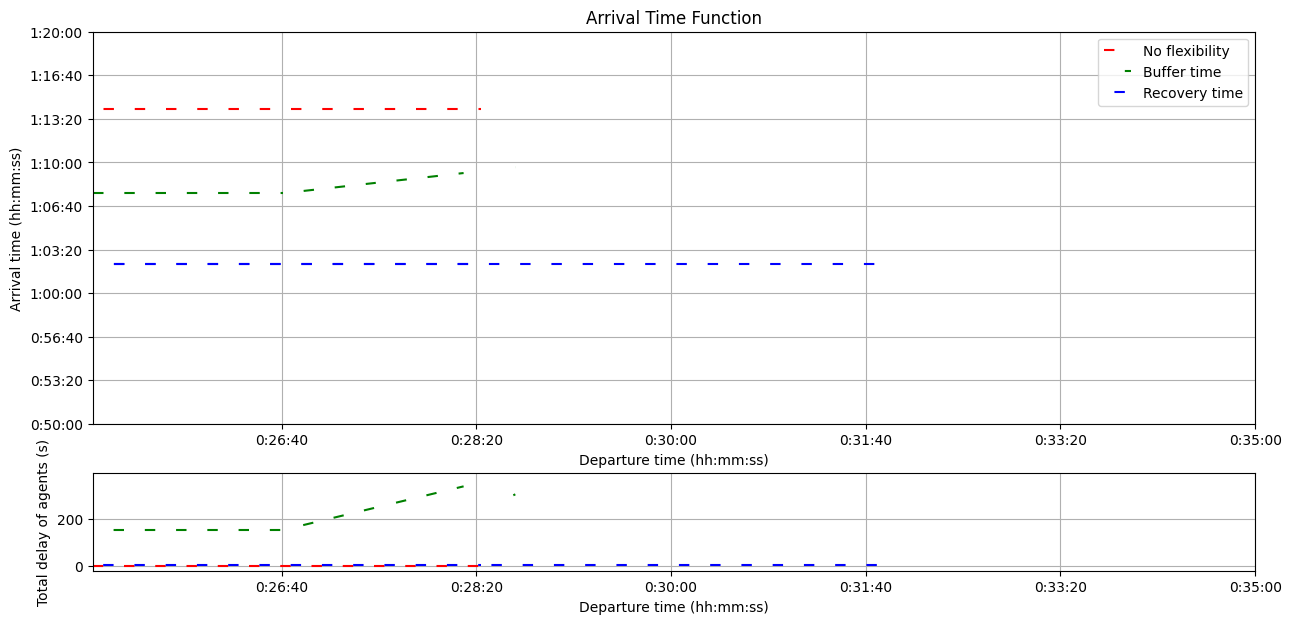

INFO:pybook.setup:Plotting <setup.Experiment object at 0x00000251163692B0>


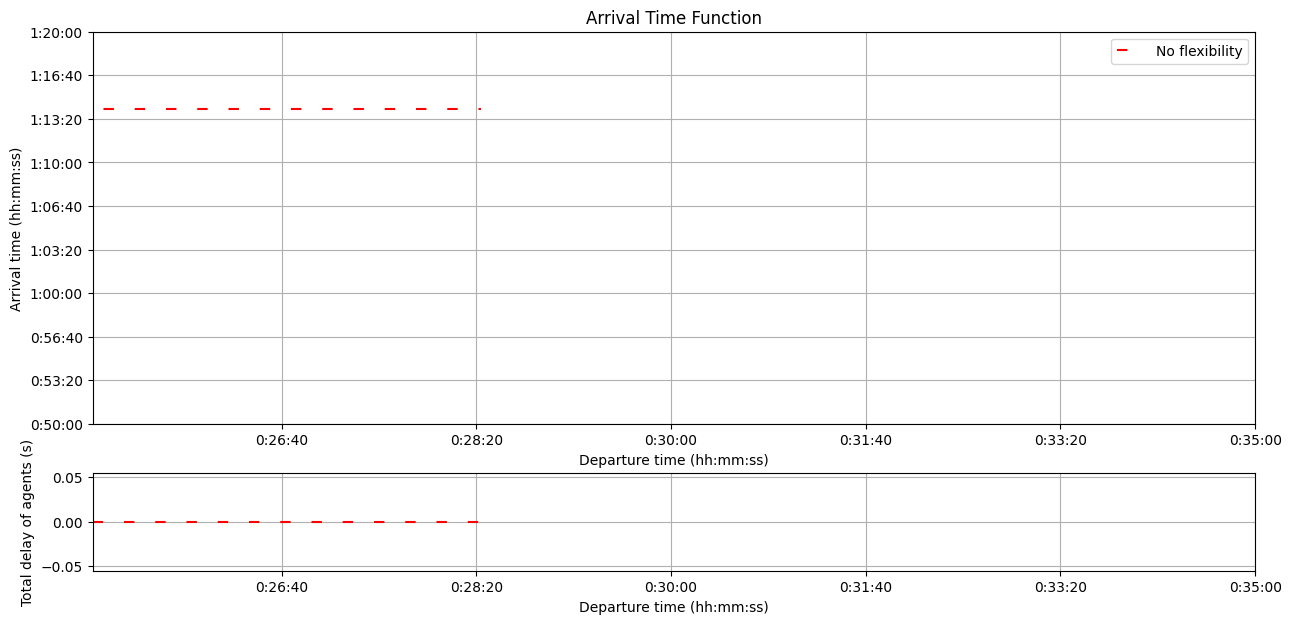

INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025124A2D760>


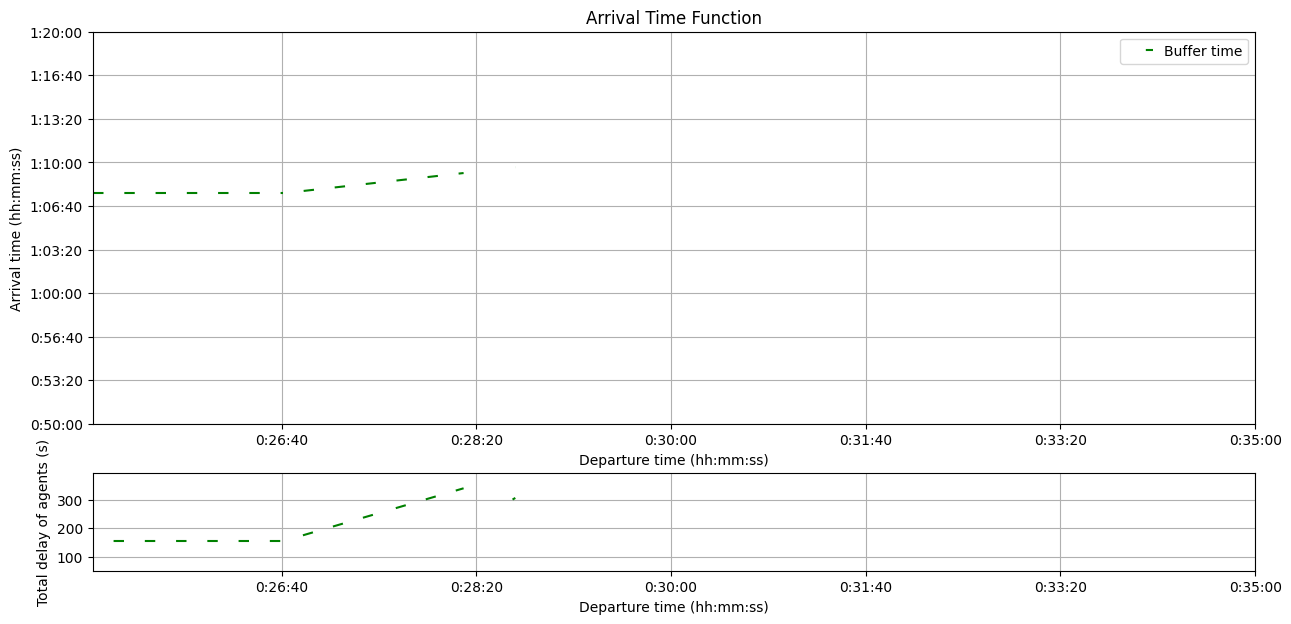

INFO:pybook.setup:Plotting <setup.Experiment object at 0x0000025116670580>


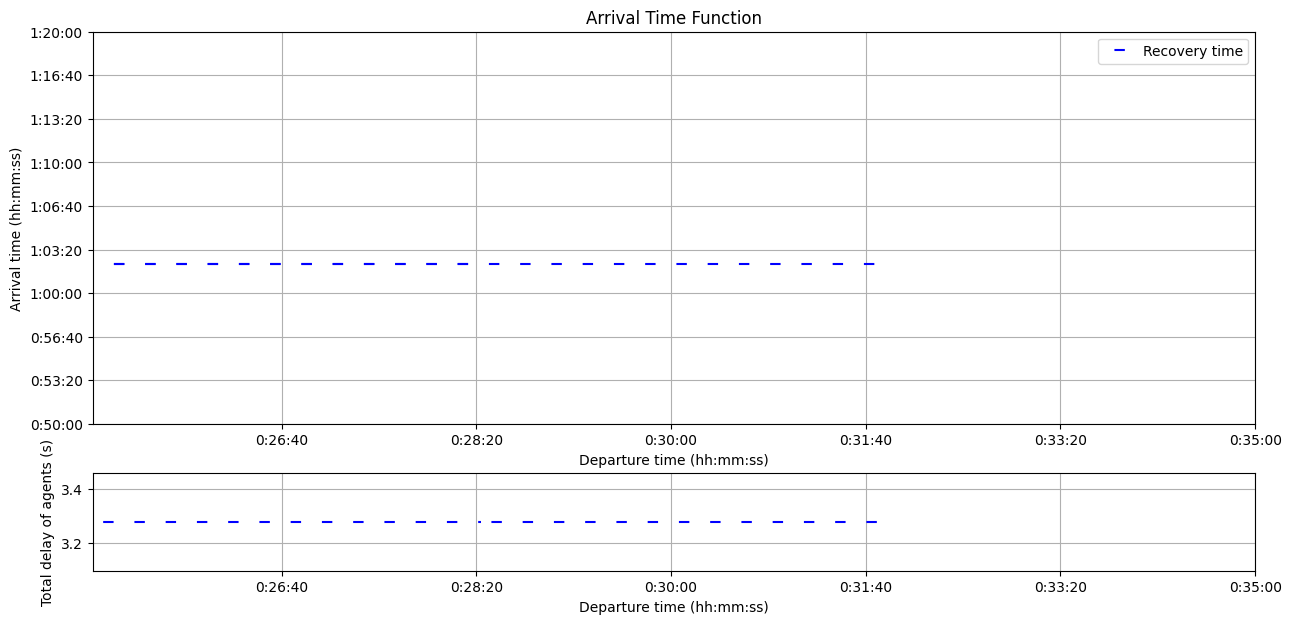

In [15]:
experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 0,  'linestyle': 0}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0,   'linestyle': 1}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': -0, 'linestyle': 2}

kwargs = {"min_x": 1503, "max_x": 2100, "min_y": 50 * 60, "max_y": 80 * 60}
plot_experiments(experiments, **kwargs)


experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 0, 'linestyle': 0}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0,  'linestyle': 1}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': 0, 'linestyle': 2}

plot_experiments([experiments[0]], **kwargs)
plot_experiments([experiments[1]], **kwargs)
plot_experiments([experiments[2]], **kwargs)

### Time statistics

In [33]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df

,Setup Time,Recompute Time,Search Time
No flexibility,64.591588,246.623732,35.259
Buffer time,64.591588,246.526145,253.956
Recovery time,64.591588,246.558642,249.597


### Search Node Statistics


In [21]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

,nodes generated,nodes decreased,nodes expanded
No flexibility,1512,283,1026
Buffer time,-1,-1,-1
Recovery time,8982,7652,5563


### Output paths found


In [22]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

Shl|1080;Shl|1098;Hfd_Shl|1757;Hfd_Shl|1771;Hfd|1106;Hfd|1132;Hfd|1148;Hfd|1202;Hfd|1228;Hfd_Ledn|1969;Hfd_Ledn|1971;Hfd_Ledn|1973;Hfd_Ledn|1975;Hfd_Ledn|1977;Hfd_Ledn|1979;Hfd_Ledn|1981;Hfd_Ledn|1983;Hfd_Ledn|1985;Hfd_Ledn|1987;Hfd_Ledn|1991;Ledn|1010;Ledn|1048;Ledn|1092;Gvm_Ledn|805;Gvm_Ledn|815;Gvm_Ledn|825;Gvm_Ledn|835;Gvm_Ledn|845;Gvm_Ledn|855;Gvm|156;Gvm|184;Laa|1815;Laa|212;Gv|224;Gv|300;Gv|328;Dt_Gv|605;Dt_Gv|613;Dt_Gv|621;Dt_Gv|629;Dt|643;Dt|6136;Dt|6166;Dt|6186;Dt|6206;Dtcp|6246;Dtcp|6266;Dt_Sdm|803;Dt_Sdm|809;Dt_Sdm|815;Dt_Sdm|819;Dt_Sdm|825;Dt_Sdm|831;Dt_Sdm|835;Sdm|38;Sdm|48;Sdm|68;Sdm|98;Rmoa_Rtd|120;Rmoa_Rtd|160;Rtd|172;Rtd|236;Rtd|344
earliest departure: 28
depart before: 28
arrive at: 62
delays trains: {35: ['201.255', '201.255', '197.977']}
Shl|1080;Shl|1098;Hfd_Shl|1757;Hfd_Shl|1771;Hfd|1106;Hfd|1130;Hfd|1148;Hfd|1202;Hfd|1228;Hfd_Ledn|1969;Hfd_Ledn|1971;Hfd_Ledn|1973;Hfd_Ledn|1975;Hfd_Ledn|1977;Hfd_Ledn|1979;Hfd_Ledn|1981;Hfd_Ledn|1983;Hfd_Ledn|1985;Hfd_Ledn|1987;Hf

### Path statistics


In [23]:
for exp in experiments:
    print(f"Differend paths found for {exp.metadata['label']}: {sum(exp.results[2].values())}")

Differend paths found for No flexibility: 5


TypeError: 'NoneType' object is not subscriptable